In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('../Datasets/vgsales1.csv', parse_dates=['Year'])
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year

na_df = df.groupby('Year')[['Global_Sales']].sum()
na_df

,Global_Sales
Year,
1980,11.38
1981,35.77
1982,28.86
1983,16.79
1984,50.36
1985,53.94
1986,37.07
1987,21.74
1988,47.22


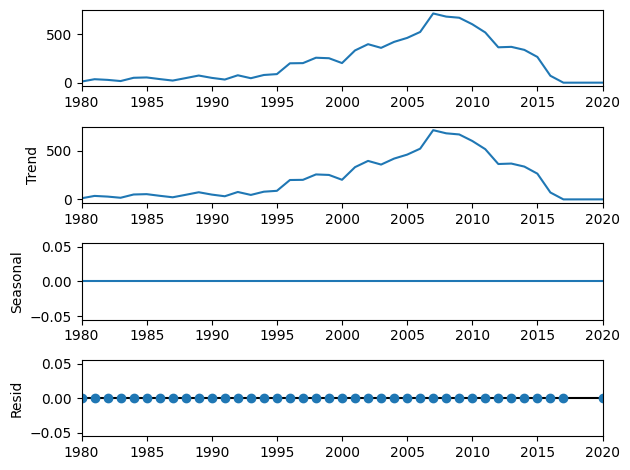

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = na_df
result = seasonal_decompose(series, model='additive', period=1)

result.plot()
pyplot.show()

<AxesSubplot: xlabel='Year'>

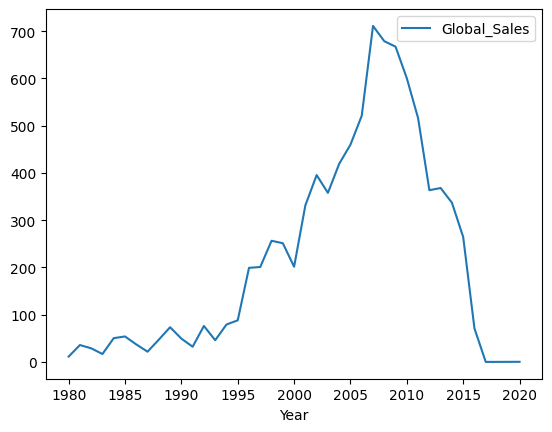

In [29]:
from statsmodels.tsa.stattools import adfuller

adfuller(na_df)

diffed = na_df.diff(1).dropna()
adfuller(diffed)

na_df.plot()

Test RMSE: 501.780


c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Year')

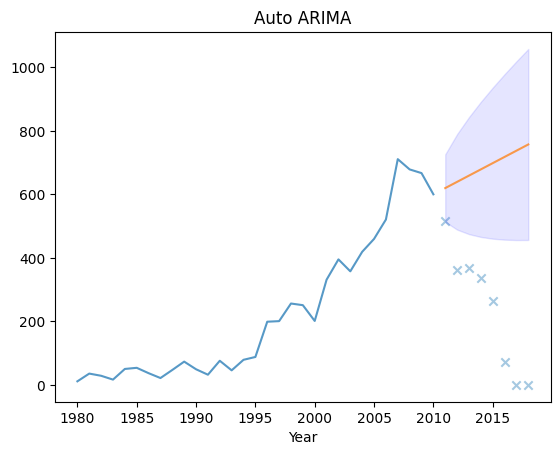

In [30]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import numpy as np


# print(na_df)
# na_df.Year = na_df.set_index("Year")
train, test = model_selection.train_test_split(na_df, train_size=31)


modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=False,
                     stepwise=True, suppress_warnings=True, D=10, max_D=10,
                     error_action='ignore')

# print(modl.summary())
preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1980  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Auto ARIMA")
plt.xlabel("Year")



c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


31    309.907401
32    258.204860
33    215.222945
34    198.798976
35    113.310405
36    131.490837
37    115.652857
38    107.699532
Name: predicted_mean, dtype: float64


c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\devrh\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 0, 'Year')

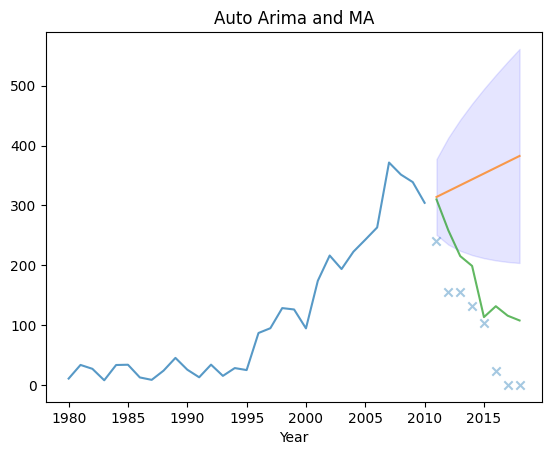

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
model = ARIMA(train, order=(0,0,10))
model_fitted  = model.fit()
predictions = model_fitted.forecast(len(test))
print(predictions)
# model_fitted.plot
# modelfit.plot_predict(dynamic = False) 

x_axis = np.arange(train.shape[0] + preds.shape[0])
x_years = x_axis + 1980  # Year starts at 1821

plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75) # forecast lynx
plt.plot(x_years[x_axis[train.shape[0]:]], predictions, alpha=0.75)  # Forecast arima
plt.scatter(x_years[x_axis[train.shape[0]:]], test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Auto Arima and MA")
plt.xlabel("Year")
# predictions.plot()

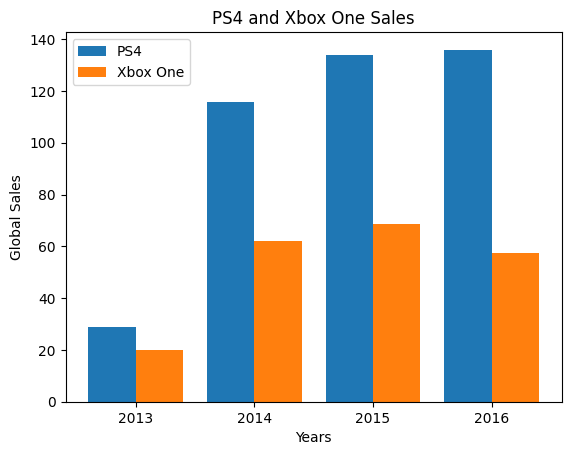

In [87]:
df = pd.read_csv('../Datasets/PS4_GamesSales.csv', parse_dates=['Year'], encoding='latin1')
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year
df = df[df.Year < 2017]
ps_df = df.groupby('Year')[['Global']].sum()

df = pd.read_csv('../Datasets/XboxOne_GameSales.csv', parse_dates=['Year'], encoding='latin1')
df["Year"].fillna(df["Year"].median(),inplace = True)
df["Year"] = df['Year'].dt.year
df = df[df.Year < 2017]

xb_df = df.groupby('Year')[['Global']].sum()

plt.bar(ps_df.index - 0.2, ps_df.Global, 0.4, label="PS4")
plt.bar(xb_df.index + 0.2, xb_df.Global, 0.4, label="Xbox One")


plt.xticks(ps_df.index, ps_df.index)
plt.xlabel("Years")
plt.ylabel("Global Sales")
plt.title("PS4 and Xbox One Sales")
plt.legend()

plt.show()


               Genre       Year   Pos  North America  Europe  Japan  \
5             Action 2018-01-01  2667           2.45    0.70    0.0   
11  Action-Adventure 2018-01-01   354           4.43    1.75    0.0   
16         Adventure 2018-01-01   354           0.04    0.00    0.0   
22          Fighting 2018-01-01   123           0.38    0.09    0.0   
49            Racing 2018-01-01   442           0.28    0.10    0.0   
54      Role-Playing 2018-01-01  1320           0.30    0.10    0.0   
67        Simulation 2018-01-01   365           0.03    0.00    0.0   
73            Sports 2018-01-01   142           0.30    0.10    0.0   
76          Strategy 2018-01-01   608           0.00    0.00    0.0   

    Rest of World  Global  
5            0.34    3.50  
11           0.64    6.82  
16           0.00    0.04  
22           0.05    0.52  
49           0.04    0.41  
54           0.04    0.44  
67           0.00    0.03  
73           0.04    0.44  
76           0.00    0.00  


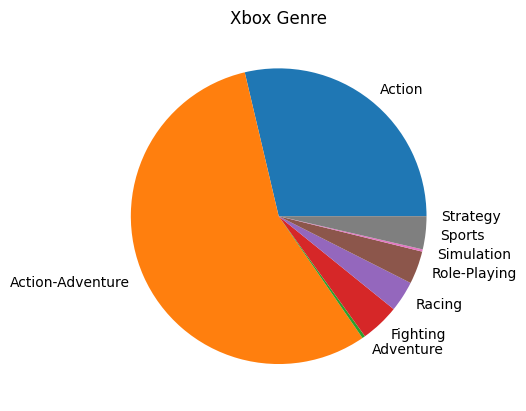

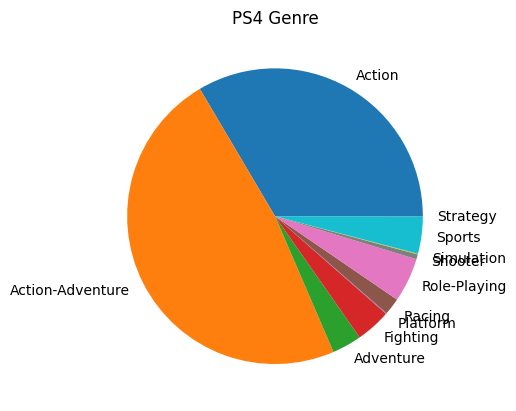

In [120]:
xbox_df = pd.read_csv("../Datasets/XboxOne_GameSales.csv",parse_dates=['Year'],encoding="latin1")
x_df = xbox_df.groupby(['Genre','Year']).agg('sum',['Global']).reset_index()
ps_df = pd.read_csv("../Datasets/PS4_GamesSales.csv",parse_dates=['Year'],encoding="latin1")
ps_df = ps_df.groupby(['Genre','Year']).agg('sum',['Global']).reset_index()


filtered_x = x_df.loc[(x_df["Year"]=="2018-01-01")]
filtered_x


filtered_ps = ps_df.loc[(ps_df["Year"]=="2018-01-01")]
filtered_ps

print(filtered_x)

plt.pie(filtered_x["Global"],labels=filtered_x["Genre"])
plt.title("Xbox Genre")
plt.show()


plt.pie(filtered_ps["Global"],labels=filtered_ps["Genre"])
plt.title("PS4 Genre")
plt.show()

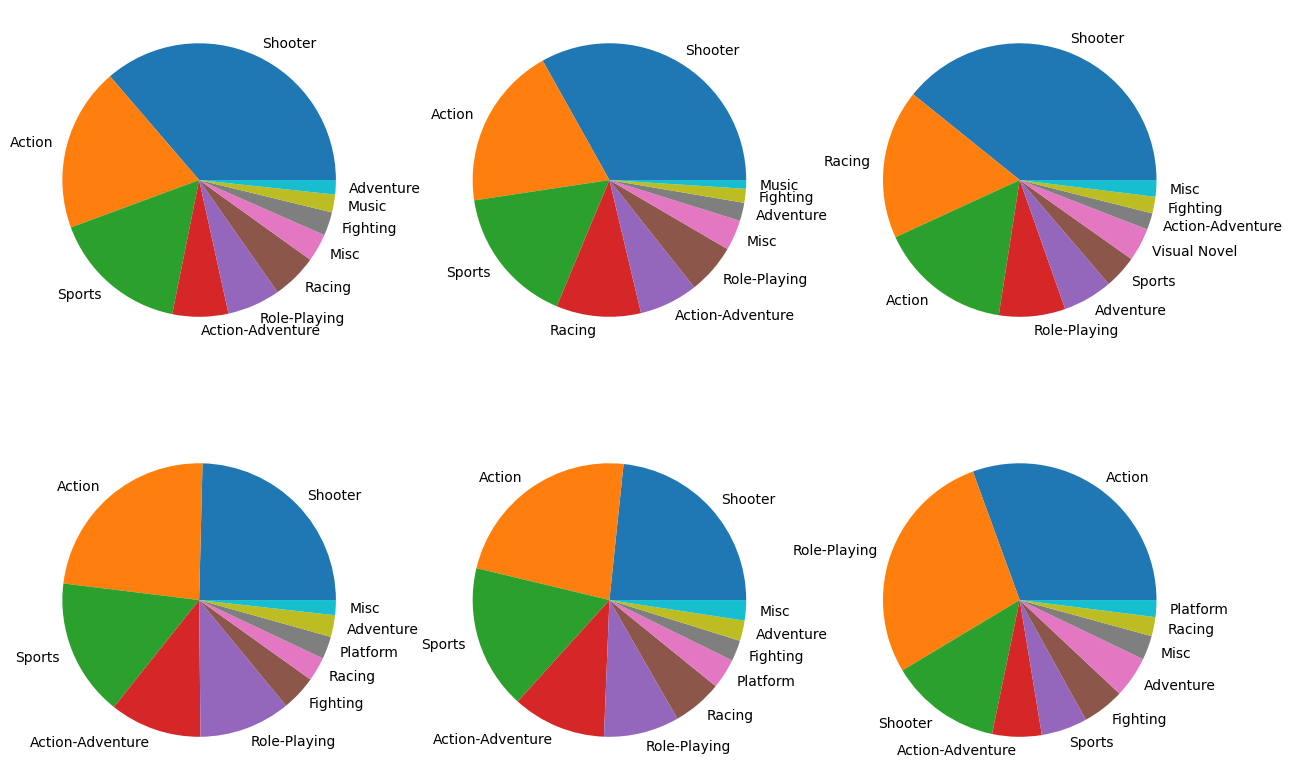

In [129]:
x_df = pd.read_csv("../Datasets/XboxOne_GameSales.csv",parse_dates=['Year'],encoding="latin1")
x_df_na = x_df.groupby(['Genre']).sum('North America').sort_values('North America', ascending=False)[:10]
x_df_eu = x_df.groupby(['Genre']).sum('Europe').sort_values('Europe', ascending=False)[:10]
x_df_jp = x_df.groupby(['Genre']).sum('Japan').sort_values('Japan', ascending=False)[:10]

ps_df = pd.read_csv("../Datasets/PS4_GamesSales.csv",parse_dates=['Year'],encoding="latin1")
ps_df_na = ps_df.groupby(['Genre']).sum('North America').sort_values('North America', ascending=False)[:10]
ps_df_eu = ps_df.groupby(['Genre']).sum('Europe').sort_values('Europe', ascending=False)[:10]
ps_df_jp = ps_df.groupby(['Genre']).sum('Japan').sort_values('Japan', ascending=False)[:10]


figure, axis = plt.subplots(2, 3)
axis[0,0].pie(x_df_na['North America'],labels=x_df_na.index)
axis[0,1].pie(x_df_eu['Europe'],labels=x_df_eu.index)
axis[0,2].pie(x_df_jp['Japan'],labels=x_df_jp.index)

axis[1,0].pie(ps_df_na['North America'],labels=ps_df_na.index)
axis[1,1].pie(ps_df_eu['Europe'],labels=ps_df_eu.index)
axis[1,2].pie(ps_df_jp['Japan'],labels=ps_df_jp.index)

figure.set_figheight(10)
figure.set_figwidth(15)

plt.show()